In [1]:
import numpy as np
import matplotlib.pyplot as plt
import h5py 

This is an evolving document looking at eddy tracking in support of the EXPORTS North Atlantic cruise. The goal is to estimate, from surface properties, whether or not an eddy will be retentive over a period of weeks.

To run this code you will need the files found in the Google Drive folder here: 

## Use 2020 data

In [2]:
year = 2020
RTfilename = 'qdForZachAprMayJun%d.mat'%year
AVISOfilename = 'aprMayJunFields%d.mat'%year
RTf = h5py.File(RTfilename,'r')
print('Variables in RT file:',list(RTf.keys()))
AVISOf = h5py.File(AVISOfilename,'r')
print('Variables in data file:',list(AVISOf.keys()))

Variables in RT file: ['#refs#', 'colsOfProps', 'eddyA_', 'eddyC_', 'fracOver30dA', 'fracOver30dC', 'g2PropertiesA', 'g2PropertiesC', 'meanRTa', 'meanRTc']
Variables in data file: ['ADT', 'Gamma1', 'Gamma2', 'SLA', 'U', 'V', 'W', 't', 'x', 'y', 'yr']


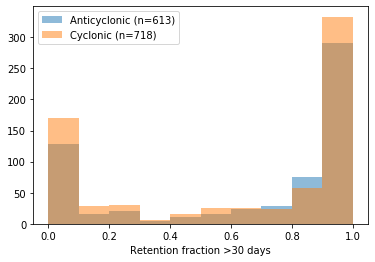

In [3]:
plt.hist(RTf['fracOver30dA'][:].T,alpha=0.5,label='Anticyclonic (n=%d)'%(len(RTf['fracOver30dA'][:].T)))
plt.hist(RTf['fracOver30dC'][:].T,alpha=0.5,label='Cyclonic (n=%d)'%(len(RTf['fracOver30dC'][:].T)))
plt.legend(loc=0)
plt.xlabel('Retention fraction >30 days');

### pick out some properties and see how well they correlate with retention time

In [4]:
names = ['RT','lon','lat','time','area','ecc','G2','OW','RTback']

In [5]:
A_RT = RTf['fracOver30dA'][:].ravel()
A_lon = RTf['eddyA_'][1]
A_lat = RTf['eddyA_'][2]
A_time = RTf['eddyA_'][3]
A_area = RTf['g2PropertiesA'][0]
A_ecc = RTf['g2PropertiesA'][3] # eccentricity
A_G2 = RTf['g2PropertiesA'][6] # mean Gamma2 within eddy
A_OW = RTf['g2PropertiesA'][7] # mean OW within eddy
A_RTback = -RTf['g2PropertiesA'][8] # backwards retention time
A_all = np.array([A_RT,A_lon,A_lat,A_time,A_area,A_ecc,A_G2,A_OW,A_RTback])
A_corr = np.corrcoef(A_all)

C_RT = RTf['fracOver30dC'][:].ravel()
C_lon = RTf['eddyC_'][1]
C_lat = RTf['eddyC_'][2]
C_time = RTf['eddyC_'][3]
C_area = RTf['g2PropertiesC'][0]
C_ecc = RTf['g2PropertiesC'][3]
C_G2 = RTf['g2PropertiesC'][6]
C_OW = RTf['g2PropertiesC'][7]
C_RTback = -RTf['g2PropertiesC'][8]
C_all = np.array([C_RT,C_lon,C_lat,C_time,C_area,C_ecc,C_G2,C_OW,C_RTback])
C_corr = np.corrcoef(C_all)

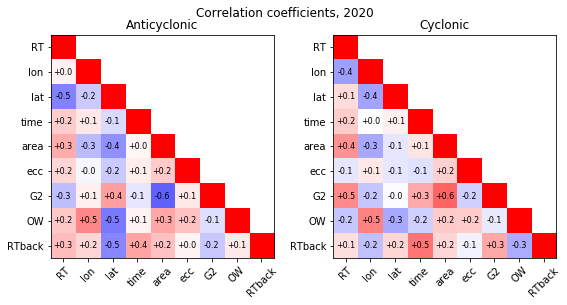

In [6]:
fig,ax = plt.subplots(1,2,figsize=(8,4))
ax[0].imshow(np.tril(A_corr),cmap=plt.cm.bwr,vmin=-1,vmax=1)
ax[1].imshow(np.tril(C_corr),cmap=plt.cm.bwr,vmin=-1,vmax=1)
ax[0].set_title('Anticyclonic')
ax[1].set_title('Cyclonic')
for i in range(len(names)):
    for j in range(i+1,len(names)):
        ax[0].text(i,j,'%+.1f'%A_corr[i,j],ha='center',va='center',fontsize=8)
        ax[1].text(i,j,'%+.1f'%C_corr[i,j],ha='center',va='center',fontsize=8)
for a in ax:
    a.set_yticks(np.arange(len(names)))
    a.set_yticklabels(names)
    a.set_xticks(np.arange(len(names)))
    a.set_xticklabels(names,rotation=45)
    a.set_ylim([-.5,len(names)-.5])
    a.invert_yaxis()
    a.set_xlim([-.5,len(names)-.5])
    a.set_aspect(1)
plt.tight_layout()
plt.suptitle('Correlation coefficients, 2020',va='bottom');

### do this same correlation for all 3 years

In [7]:
years = [2018,2019,2020]
RTfilenames = ['qdForZachAprMayJun%d.mat'%year for year in years]
RTfs = [h5py.File(f,'r') for f in RTfilenames]
A_all_yr = [np.array([f['fracOver30dA'][:].ravel(),f['eddyA_'][1],f['eddyA_'][2],f['eddyA_'][3],
                      f['g2PropertiesA'][0],f['g2PropertiesA'][3],f['g2PropertiesA'][6],f['g2PropertiesA'][7],-f['g2PropertiesA'][8]])
            for f in RTfs]
C_all_yr = [np.array([f['fracOver30dC'][:].ravel(),f['eddyC_'][1],f['eddyC_'][2],f['eddyC_'][3],
                      f['g2PropertiesC'][0],f['g2PropertiesC'][3],f['g2PropertiesC'][6],f['g2PropertiesC'][7],-f['g2PropertiesC'][8]])
            for f in RTfs]
A_corr_yr = [np.corrcoef(a) for a in A_all_yr]
C_corr_yr = [np.corrcoef(c) for c in C_all_yr]

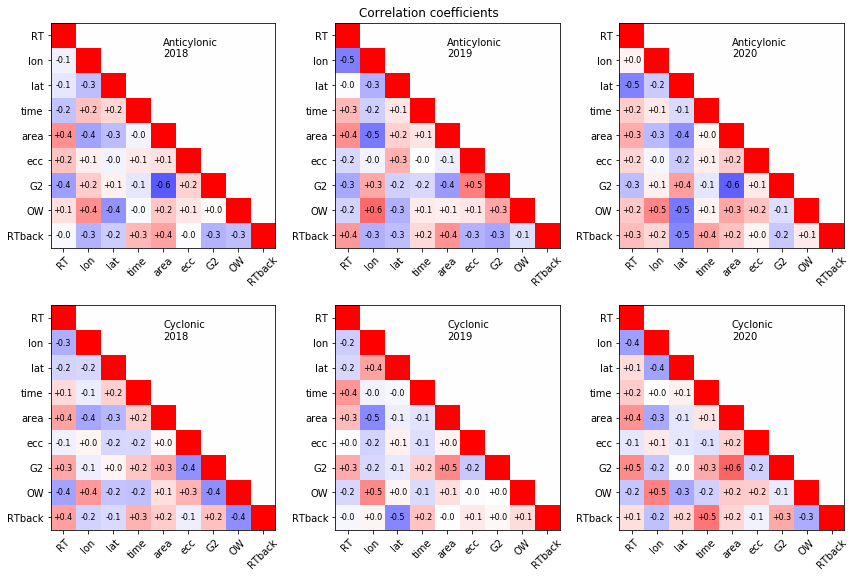

In [8]:
fig,ax = plt.subplots(2,3,figsize=(12,8))
for k in range(len(years)):
    ax[0,k].imshow(np.tril(A_corr_yr[k]),cmap=plt.cm.bwr,vmin=-1,vmax=1)
    ax[1,k].imshow(np.tril(C_corr_yr[k]),cmap=plt.cm.bwr,vmin=-1,vmax=1)
    for i in range(len(names)):
        for j in range(i+1,len(names)):
            ax[0,k].text(i,j,'%+.1f'%A_corr_yr[k][i,j],ha='center',va='center',fontsize=8)
            ax[1,k].text(i,j,'%+.1f'%C_corr_yr[k][i,j],ha='center',va='center',fontsize=8)
    ax[0,k].text(4,0.5,'Anticylonic\n%d'%years[k],va='center')
    ax[1,k].text(4,0.5,'Cyclonic\n%d'%years[k],va='center')
for a in ax.ravel():
    a.set_yticks(np.arange(len(names)))
    a.set_yticklabels(names)
    a.set_xticks(np.arange(len(names)))
    a.set_xticklabels(names,rotation=45)
    a.set_ylim([-.5,len(names)-.5])
    a.invert_yaxis()
    a.set_xlim([-.5,len(names)-.5])
    a.set_aspect(1)
plt.tight_layout()
plt.suptitle('Correlation coefficients',va='bottom');

## Map out eddies

In [9]:
ID_A = np.unique(RTf['eddyA_'][0])
ID_C = np.unique(RTf['eddyC_'][0])
print('Unique eddy indices:')
print('Anticyclonic:',ID_A.astype('int'))
print('    Cyclonic:',ID_C.astype('int'))


Unique eddy indices:
Anticyclonic: [ 1  2  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27
 28 29 30 31]
    Cyclonic: [ 3  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28]


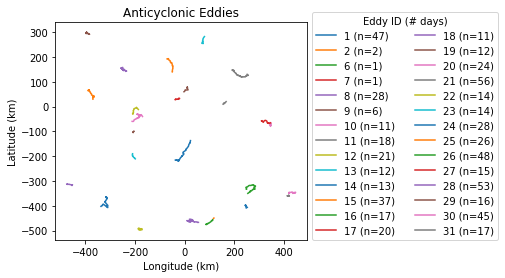

In [10]:
for ID in ID_A:
    inds = RTf['eddyA_'][0]==ID
    plt.plot(RTf['eddyA_'][1][inds],RTf['eddyA_'][2][inds],label='%d (n=%d)'%(ID,np.sum(inds)))
plt.legend(ncol=2,loc=(1.02,0),title='Eddy ID (# days)')
plt.title('Anticyclonic Eddies');
plt.xlabel('Longitude (km)')
plt.ylabel('Latitude (km)');
plt.gca().set_aspect(1);

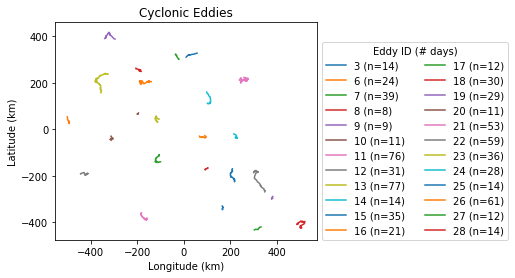

In [11]:
for ID in ID_C:
    inds = RTf['eddyC_'][0]==ID
    plt.plot(RTf['eddyC_'][1][inds],RTf['eddyC_'][2][inds],label='%d (n=%d)'%(ID,np.sum(inds)))
plt.legend(ncol=2,loc=(1.02,0),title='Eddy ID (# days)')
plt.title('Cyclonic Eddies');
plt.xlabel('Longitude (km)')
plt.ylabel('Latitude (km)');
plt.gca().set_aspect(1);

### map out eddies for a particular day

In [12]:
x = AVISOf['x'][:].ravel() # in km
y = AVISOf['y'][:].ravel() # in km
t = AVISOf['t'][:].ravel() # in matlab time

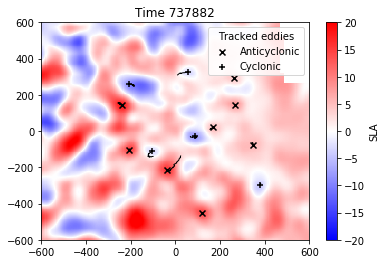

In [13]:
t_ind = 0
plt.pcolormesh(x,y,AVISOf['SLA'][t_ind].T,vmin=-20,vmax=20,cmap=plt.cm.bwr)
plt.colorbar(label='SLA')
inds = A_time==t[t_ind]
plt.scatter(A_lon[inds],A_lat[inds],marker='x',c='k',label='Anticyclonic')
for ID in RTf['eddyA_'][0][inds]:
    plt.plot(A_lon[RTf['eddyA_'][0]==ID],A_lat[RTf['eddyA_'][0]==ID],c='k',lw=1)
inds = C_time==t[t_ind]
plt.scatter(C_lon[inds],C_lat[inds],marker='+',c='k',label='Cyclonic')
for ID in RTf['eddyC_'][0][inds]:
    plt.plot(C_lon[RTf['eddyC_'][0]==ID],C_lat[RTf['eddyC_'][0]==ID],c='k',lw=1)
plt.legend(loc='upper right',title='Tracked eddies')
plt.title('Time %d'%t[t_ind]);